# Introduction
The following file can extract some image frames out of the HDF5 file.

# Requirements

## Python Packages
- numpy
- matplotlib
- pandas
- tables

## Data
The [Road Hackers dataset](http://data.apollo.auto/help?name=data_intro_roadhacker&data_key=road_hackers&data_type=0&locale=en-us&lang=en) from Apollo.

# Extra requirements for this notebook
To actually use this notebook, the following packages are also needed.
- jupyter
- pythreejs

After that, please run the following commands  
`jupyter nbextension install --py --symlink --sys-prefix pythreejs`  
`jupyter nbextension enable --py --sys-prefix pythreejs`  

In [2]:
# Import necessary packages.
%matplotlib inline
import numpy as np
import pandas as pd
import tables
from matplotlib.pyplot import imshow

# Get the timestamps

In [3]:
# Open a HF5 file.
h5f = tables.open_file('./roadhacker_sample/attr/667.h5', 'r')

In [4]:
# Get a data out into a data frame.
column_names = [
    't', 'VEast', 'VNorth',
    'curv1', 'curv2', 'curv3',
    'curv4', 'curv5', 'curv6',
    'x', 'y', 'heading',
    'tag'
]

tbl = h5f.get_node('/', 'attrs')
rows = tbl.read()
h5f.close() # Close a file.
df = pd.DataFrame(rows, columns=column_names)

In [5]:
df.head(5)

,t,VEast,VNorth,curv1,curv2,curv3,curv4,curv5,curv6,x,y,heading,tag
0,1.476238e+09,-0.9650,-11.7740,-0.000318,-0.000365,-0.000412,-0.000459,-0.000506,-0.000554,-0.189703,-1.476279,-174.2090,0.0
1,1.476238e+09,-0.9930,-11.8675,-0.000554,-0.000570,-0.000586,-0.000603,-0.000619,-0.000635,-0.192239,-1.487292,-174.1585,0.0
2,1.476238e+09,-1.0070,-11.9710,-0.000635,-0.000654,-0.000673,-0.000692,-0.000710,-0.000729,-0.195165,-1.499408,-174.0980,0.0
3,1.476238e+09,-1.0285,-12.0575,-0.000729,-0.000708,-0.000686,-0.000665,-0.000643,-0.000622,-0.198331,-1.509280,-174.0480,0.0
4,1.476238e+09,-1.0410,-12.1310,-0.000622,-0.000622,-0.000623,-0.000623,-0.000623,-0.000624,-0.201134,-1.519731,-174.0000,0.0


In [7]:
# Timestamp at frame 1.
frame = 1
df['t'][frame]

1476238264.125

# Get some image frames

In [8]:
# Get couple images out of the file.
h5f_image = tables.open_file('./roadhacker_sample/image/667.h5', 'r')

## Frame 0

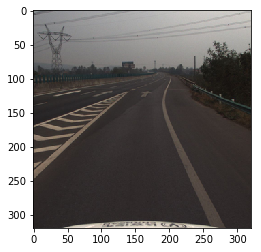

In [9]:
frame = 0
tbl_image = h5f_image.get_node('/', '%.3f' % df['t'][frame])
rows_image = tbl_image.read()
imshow(rows_image)

## Frame 1

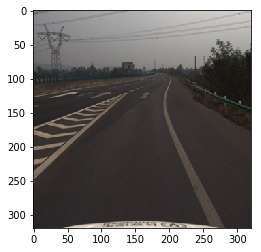

In [10]:
frame = 1
tbl_image = h5f_image.get_node('/', '%.3f' % df['t'][frame])
rows_image = tbl_image.read()
imshow(rows_image)

## Frame 2

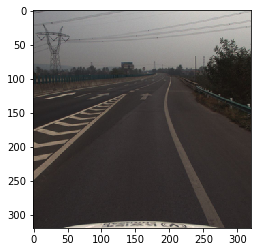

In [11]:
frame = 2
tbl_image = h5f_image.get_node('/', '%.3f' % df['t'][frame])
rows_image = tbl_image.read()
imshow(rows_image)

In [12]:
# Close the HDF5 file.
h5f_image.close()